In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [94]:
# Lecture du fichier
df = pd.read_excel('data.xlsx')

In [95]:
# Affichage de la db
df

,IDEN,pain,légumes,fruits,viande,volaille,lait,vin
0,MA2,332,428,354,1437,526,247,427
1,EM2,293,559,388,1527,567,239,258
2,CA2,372,767,562,1948,927,235,433
3,MA3,406,563,341,1507,544,324,407
4,EM3,386,608,396,1501,568,319,363
5,CA3,438,843,689,2345,1148,243,341
6,MA4,534,660,367,1620,638,414,407
7,EM4,460,699,484,1856,762,400,416
8,CA4,385,789,621,2366,1149,304,282
9,MA5,655,776,423,1848,759,495,486


In [96]:
# Description statistique
df.describe()

,pain,légumes,fruits,viande,volaille,lait,vin
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,446.666667,732.000000,505.000000,1886.750000,804.000000,358.250000,368.583333
std,107.147590,189.180049,165.092261,395.750409,248.682711,117.127068,71.781814
min,293.000000,428.000000,341.000000,1437.000000,526.000000,235.000000,258.000000
25%,381.750000,596.750000,382.750000,1522.000000,567.750000,246.000000,310.250000
50%,422.000000,733.000000,453.500000,1852.000000,760.500000,321.500000,385.000000
75%,519.750000,802.500000,576.750000,2128.250000,982.250000,434.250000,418.750000
max,655.000000,1097.000000,887.000000,2630.000000,1167.000000,561.000000,486.000000


# 1.Commentaire du tableau des statistiques sommaires


On constate que:<br>
 - les variables sont homogènes et ont des echelles differentes(par exemple viande varie entre 1800-2600 tandis que lait varie entre 240-560):Ce qui nous poussera à standariser nos données avant l'ACP.

 - Viande,vollaille et légume ont des ecart-types important du à la grande variabilité entre les catégories socio-professionelles.

 - les moyenne et  médianes des differentes variables sont aussi proches,pas de valeur d'extreme sauf CA5 qui a des plus grandes valeurs au niveau de la viande,legumes et vollailes. 

 Ce qui nous pousse a dire les variables sont sur des echelles differentes et presentent des grandes variabilité.

# 2.Ce qu'ont peut dire des correlations

In [97]:
df.iloc[:,1:]

,pain,légumes,fruits,viande,volaille,lait,vin
0,332,428,354,1437,526,247,427
1,293,559,388,1527,567,239,258
2,372,767,562,1948,927,235,433
3,406,563,341,1507,544,324,407
4,386,608,396,1501,568,319,363
5,438,843,689,2345,1148,243,341
6,534,660,367,1620,638,414,407
7,460,699,484,1856,762,400,416
8,385,789,621,2366,1149,304,282
9,655,776,423,1848,759,495,486


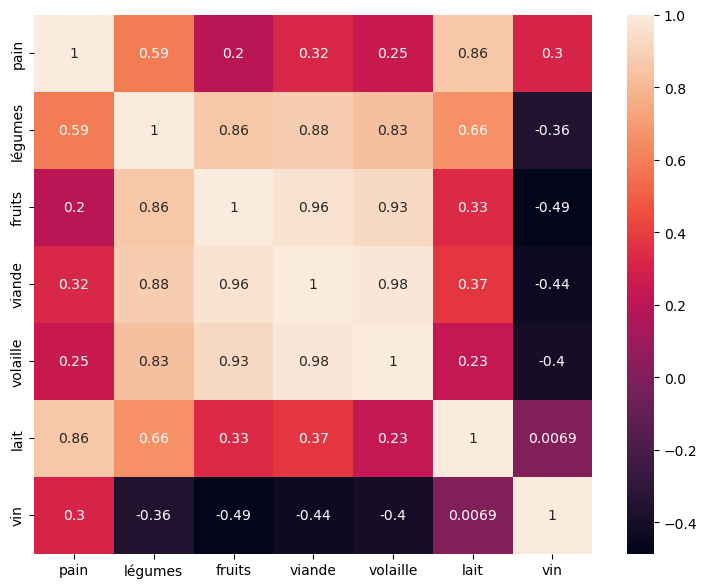

In [98]:
#Trouvons les correlations entre les differentes variables
cols = df.columns[1:]              
corr = df.iloc[:,1:].corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr,
            annot=True,)
plt.show()


Corrélations fortes : viande et volaille sont fortement corrélées entre elles (les catégories qui dépensent beaucoup en viande dépensent aussi beaucoup en volaille). De même viande est fortement corrélée avec légumes et légumes corrèle positivement avec fruits.

Variables moins corrélées : lait et vin sont moins corrélés avec certaines variables alimentaires.

# 3.Application de l’algorithme de l’ACP à ce jeu de données


a.Standardisation des données

In [99]:

X = df.iloc[:,1:].values
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std
print(pd.DataFrame(X_standardized, index=df['IDEN'], columns=cols))

          pain   légumes    fruits    viande  volaille      lait       vin
IDEN                                                                      
MA2  -1.117761 -1.678389 -0.955310 -1.186982 -1.167598 -0.992058  0.849995
EM2  -1.497930 -0.955136 -0.740207 -0.949454 -0.995399 -1.063397 -1.609050
CA2  -0.727845  0.193236  0.360614  0.161651  0.516599 -1.099066  0.937299
MA3  -0.396415 -0.933052 -1.037556 -1.002238 -1.091998 -0.305420  0.558984
EM3  -0.591374 -0.684606 -0.689595 -1.018073 -0.991199 -0.350007 -0.081241
CA3  -0.084482  0.612833  1.164087  1.209415  1.444798 -1.027727 -0.401353
MA4   0.851318 -0.397513 -0.873065 -0.704008 -0.697199  0.497144  0.558984
EM4   0.129972 -0.182194 -0.132858 -0.081156 -0.176400  0.372300  0.689939
CA4  -0.601122  0.314698  0.733881  1.264838  1.448998 -0.483768 -1.259836
MA5   2.030816  0.242925 -0.518778 -0.102269 -0.189000  1.219451  1.708479
EM5   1.338714  1.452027  0.272042  0.446685  0.373799  1.424551 -0.721466
CA5   0.666108  2.015171 

b.La matrice de covariance

In [100]:
M_cov = np.cov(X_standardized,rowvar=False,ddof=0)
M_cov

array([[ 1.        ,  0.59311021,  0.19613878,  0.32126911,  0.24681402,
         0.8555748 ,  0.30376123],
       [ 0.59311021,  1.        ,  0.85625022,  0.88108065,  0.82730007,
         0.66279874, -0.35646825],
       [ 0.19613878,  0.85625022,  1.        ,  0.95947671,  0.9263958 ,
         0.33218856, -0.48628058],
       [ 0.32126911,  0.88108065,  0.95947671,  1.        ,  0.98168805,
         0.37459064, -0.43723528],
       [ 0.24681402,  0.82730007,  0.9263958 ,  0.98168805,  1.        ,
         0.23248901, -0.40185403],
       [ 0.8555748 ,  0.66279874,  0.33218856,  0.37459064,  0.23248901,
         1.        ,  0.0068796 ],
       [ 0.30376123, -0.35646825, -0.48628058, -0.43723528, -0.40185403,
         0.0068796 ,  1.        ]])

In [101]:
df_R = pd.DataFrame(M_cov, index=cols, columns=cols)
df_R

,pain,légumes,fruits,viande,volaille,lait,vin
pain,1.000000,0.593110,0.196139,0.321269,0.246814,0.855575,0.303761
légumes,0.593110,1.000000,0.856250,0.881081,0.827300,0.662799,-0.356468
fruits,0.196139,0.856250,1.000000,0.959477,0.926396,0.332189,-0.486281
viande,0.321269,0.881081,0.959477,1.000000,0.981688,0.374591,-0.437235
volaille,0.246814,0.827300,0.926396,0.981688,1.000000,0.232489,-0.401854
lait,0.855575,0.662799,0.332189,0.374591,0.232489,1.000000,0.006880
vin,0.303761,-0.356468,-0.486281,-0.437235,-0.401854,0.006880,1.000000


c. Determinons la metrique M


Etant donné que nos données sont homogene M = I7

d.Etude spectrale

In [102]:
# Etude spectrale
valeurs_propres, vecteurs_propres = np.linalg.eig(M_cov)

In [103]:
print(np.round(valeurs_propres, 2))

[4.33 1.83 0.63 0.13 0.06 0.02 0.  ]


In [104]:
print(np.round(vecteurs_propres, 2))

[[ 0.24  0.62  0.01 -0.54  0.04 -0.51 -0.02]
 [ 0.47  0.1   0.06 -0.03 -0.81  0.3   0.16]
 [ 0.45 -0.21 -0.15  0.55 -0.07 -0.63 -0.2 ]
 [ 0.46 -0.14 -0.21 -0.05  0.42  0.1   0.73]
 [ 0.44 -0.2  -0.35 -0.32  0.22  0.35 -0.61]
 [ 0.28  0.52  0.44  0.45  0.34  0.33 -0.15]
 [-0.21  0.48 -0.78  0.31 -0.07  0.14  0.04]]


In [105]:
# Verifions si le normes des vecteurs propres sont egales a 1
u1 = vecteurs_propres[:,0:1]
u2 = vecteurs_propres[:,1:2]
u3 = vecteurs_propres[:,2:3]
u4 = vecteurs_propres[:,3:4]
u5 = vecteurs_propres[:,4:5]
u6 = vecteurs_propres[:,5:6]
u7 = vecteurs_propres[:,6:7]


n_u1=np.linalg.norm(u1)
n_u2=np.linalg.norm(u2)
n_u3=np.linalg.norm(u3)
n_u4=np.linalg.norm(u4)
n_u5=np.linalg.norm(u5)
n_u6=np.linalg.norm(u6)
n_u7=np.linalg.norm(u7)
print("n_=u1=",n_u1,"\nn_u2=",n_u2,"\nn_u3=",n_u3,"\nn_u4=",n_u4,"\nn_u5=",n_u5,"\nn_u6=",n_u6,"\nn_u7=",n_u7)


n_=u1= 1.0 
n_u2= 0.9999999999999999 
n_u3= 1.0 
n_u4= 1.0 
n_u5= 0.9999999999999999 
n_u6= 0.9999999999999998 
n_u7= 0.9999999999999999


In [106]:
# Trouvons la quantites de representation de chaque composante principale
total_variance = np.sum(valeurs_propres)
v1 = valeurs_propres[0] / total_variance * 100
v2 = valeurs_propres[1] / total_variance * 100
v3 = valeurs_propres[2] / total_variance * 100
v4 = valeurs_propres[3] / total_variance * 100
v5 = valeurs_propres[4] / total_variance * 100
v6 = valeurs_propres[5] / total_variance * 100
v7 = valeurs_propres[6] / total_variance * 100
print(f"Composante 1: {v1:.2f}%, Composante 2: {v2:.2f}%, Composante 3: {v3:.2f}%, Composante 4: {v4:.2f}%, Composante 5: {v5:.2f}%, Composante 6: {v6:.2f}%, Composante 7: {v7:.2f}%")

Composante 1: 61.91%, Composante 2: 26.16%, Composante 3: 9.00%, Composante 4: 1.83%, Composante 5: 0.82%, Composante 6: 0.27%, Composante 7: 0.02%


On retient alors deux axes

In [107]:
CP1 = X_standardized @ u1
CP2 = X_standardized @ u2

coord = np.hstack((CP1, CP2))
coord_df = pd.DataFrame(coord, index=df['IDEN'], columns=['CP1', 'CP2'])
coord_df

,CP1,CP2
IDEN,,
MA2,-2.989033,-0.379427
EM2,-1.975514,-1.870755
CA2,-0.123682,-0.757975
MA3,-2.134834,0.338428
EM3,-1.754270,-0.177184
CA3,1.770773,-1.415208
MA4,-0.977431,1.433504
EM4,-0.265448,0.661259
CA4,1.673047,-1.813237


C:\Users\HACK LAB\AppData\Local\Temp\ipykernel_3392\525363560.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (coord_df['CP1'][i], coord_df['CP2'][i]))


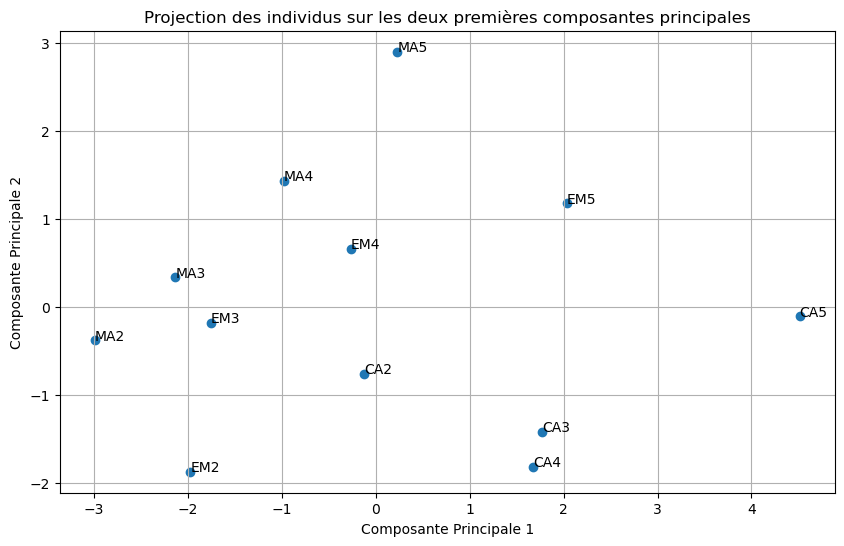

In [108]:
plt.figure(figsize=(10,6))
plt.scatter(coord_df['CP1'], coord_df['CP2'])
for i, txt in enumerate(coord_df.index):
    plt.annotate(txt, (coord_df['CP1'][i], coord_df['CP2'][i]))
plt.title('Projection des individus sur les deux premières composantes principales')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.grid()
plt.show()


In [118]:
# Contribution de chaque individu aux composantes principales
contrib_cp1 = (CP1 ** 2) / np.sum(CP1 ** 2) * 100
contrib_cp2 = (CP2 ** 2) / np.sum(CP2 ** 2) * 100
contrib_df = pd.DataFrame({'Contrib_CP1': contrib_cp1.flatten(), 'Contrib_CP2': contrib_cp2.flatten()}, index=df['IDEN'])
contrib_df

,Contrib_CP1,Contrib_CP2
IDEN,,
MA2,17.179924,0.655209
EM2,7.504467,15.927854
CA2,0.029415,2.614767
MA3,8.763710,0.521263
EM3,5.917698,0.142881
CA3,6.029559,9.115161
MA4,1.837098,9.352360
EM4,0.135493,1.990061
CA4,5.382404,14.963480


# UTILISATION DE SCIKIT-LEARN

In [109]:
from sklearn.decomposition import PCA 
acp = PCA()

In [110]:
#coordonnées factorielles
coord = acp.fit_transform(X_standardized)

In [111]:
#afficher les nouvelles coordonnées 

print(pd.DataFrame(coord, index=df['IDEN'], columns=cols))

          pain   légumes    fruits    viande  volaille      lait       vin
IDEN                                                                      
MA2  -2.989033 -0.379427  0.418806  0.380114 -0.233362  0.069086 -0.021894
EM2  -1.975514 -1.870755 -1.367490 -0.165144  0.097680  0.076795  0.031663
CA2  -0.123682 -0.757975  1.484468  0.202784  0.465104 -0.159996 -0.010613
MA3  -2.134834  0.338428 -0.113416  0.110467 -0.009908 -0.070778  0.068658
EM3  -1.754270 -0.177184 -0.523213  0.153064  0.176994  0.044485 -0.051534
CA3   1.770773 -1.415208  1.039224 -0.450268  0.074774  0.279747  0.014260
MA4  -0.977431  1.433504 -0.289905 -0.273158 -0.097690  0.071370 -0.052232
EM4  -0.265448  0.661259  0.284388  0.301416 -0.166142 -0.112956  0.015796
CA4   1.673047 -1.813237  0.101947 -0.416810 -0.440487 -0.232913 -0.016615
MA5   0.227912  2.900909  0.591651 -0.256496 -0.128591  0.065845  0.023805
EM5   2.036628  1.182972 -1.033760 -0.338331  0.340918 -0.130443 -0.003257
CA5   4.511852 -0.103286 

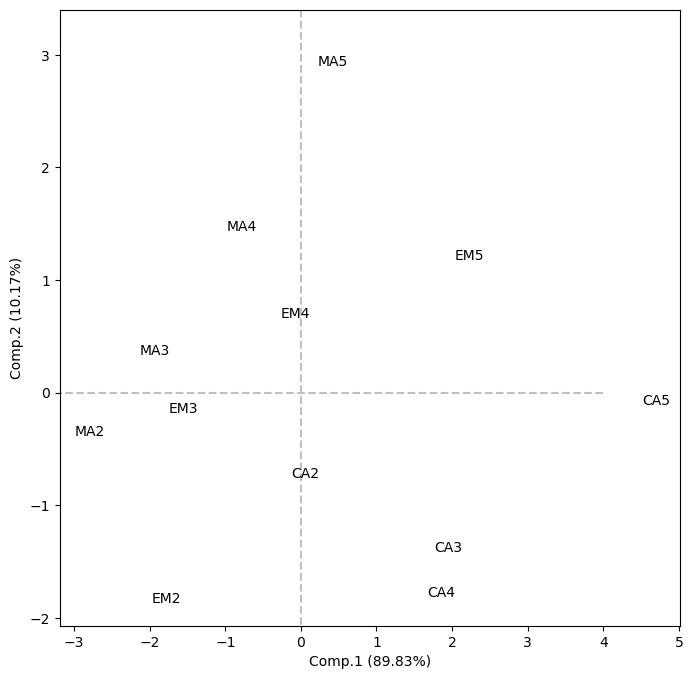

In [112]:
# Representation dans le repere factoriel
fig, ax = plt.subplots(figsize=(8,8)) 
ax.plot(coord[:,0],coord[:,1],"wo") 
ax.axis([-4,+6,-4,+4]) 
ax.plot([-4,+4],[0,0],color='silver',linestyle='--') 
ax.plot([0,0],[-4,+4],color='silver',linestyle='--') 
ax.set_xlabel("Comp.1 (89.83%)") 
ax.set_ylabel("Comp.2 (10.17%)")
n = coord.shape[0]
D = df.set_index('IDEN')
x_min, x_max = coord[:,0].min() - 0.2, coord[:,0].max() + 0.5
y_min, y_max = coord[:,1].min() - 0.2, coord[:,1].max() + 0.5
ax.axis([x_min, x_max, y_min, y_max])
for i in range(n): 
    ax.text(coord[i,0],coord[i,1],D.index[i])
    
plt.show()